In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-12-06 13:10:40--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.005s  

2023-12-06 13:10:40 (10.3 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
# Convert categorical data to numbers
dataset["sex"] = pd.factorize(dataset["sex"])[0]
dataset["region"] = pd.factorize(dataset["region"])[0]
dataset["smoker"] = pd.factorize(dataset["smoker"])[0]
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86


In [ ]:
# Separating the train and test datasets
test_dataset = dataset.sample(frac=0.2)
train_dataset = dataset[~dataset.isin(test_dataset)].dropna()

In [ ]:
# Prepare the labels
train_labels = train_dataset.pop("expenses")
test_labels = test_dataset.pop("expenses")

In [ ]:
# Prepare the model
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

model = keras.Sequential([
    normalizer,
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)
])

In [ ]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse']
)
model.build()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normaliza  (None, 6)                 13        
 tion)                                                           
                                                                 
 dense_8 (Dense)             (None, 32)                224       
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 782 (3.06 KB)
Trainable params: 769 (3.00 KB)
Non-trainable params: 13 (56.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100,
    verbose=1,
)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 11014.7598 - mae: 11014.7598 - mse: 256079360.0000
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 4400.9961 - mae: 4400.9961 - mse: 69151608.0000
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 3149.9395 - mae: 3149.9395 - mse: 38650280.0000
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 2941.4407 - mae: 2941.4407 - mse: 33859944.0000
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 2734.1477 - mae: 2734.1477 - mse: 32473784.0000
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 2672.2026 - mae: 2672.2026 - mse: 29090878.0000
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 2541.5610 - mae: 2541.5610 - mse: 26030780.0000
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 2404.4592 - mae: 2404.4592 - mse: 25706622.0000
Epoch 9/100
34/34 [==========

9/9 - 0s - loss: 2514.0532 - mae: 2514.0532 - mse: 34152168.0000 - 234ms/epoch - 26ms/step
Testing set Mean Abs Error: 2514.05 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 4ms/step


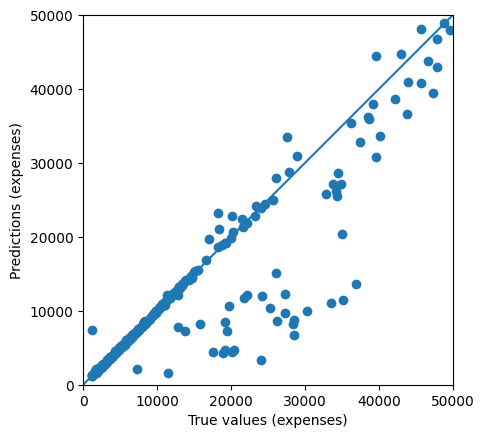

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
